In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

55.693699101743334 91.83349547063358
-73.52006612703502 80.15446418640158
-81.85772833776575 108.8781939733733
-46.407704917259906 -36.95808085668469
-2.1891654038154513 118.88206917932212
35.99742265261071 -170.33877841979034
-51.464120601837934 108.70369654817307
-42.495995632132136 16.603640319324313
74.97600042096107 165.1242747730965
59.191150138615626 -145.07020213680653
-42.00447347474377 -94.14481678206548
-73.88107661817834 0.5429089273465024
61.19160429404755 167.25692332598106
-63.12310356274402 17.778739236576087
-38.61802511637442 92.60964193777573
-40.59217588200424 159.6284782908241
67.28392046581783 -115.79745738237203
80.49570539786583 53.18139737024859
31.500968495743606 0.5446761884489604
-11.8223021111815 6.913394138323099
-60.58419066464351 81.8459060280453
-15.204718054334776 100.69873812801796
34.163527046348136 20.212528764678638
88.0418612120707 -54.95894847339875
19.420898460137835 -136.81272704058793
-50.90423629039184 -148.18749369063084
-89.8805512147485 9.

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

582

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4dff440b07db3eb165baed62bc40d77d


In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | balakhta
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | rantepao
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | palmer
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | tilichiki
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | aflu
City not found. Skipping...
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | tukrah
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | hilo
Processing Re

Processing Record 36 of Set 4 | syedove
Processing Record 37 of Set 4 | vila franca do campo
Processing Record 38 of Set 4 | juneau
Processing Record 39 of Set 4 | manicore
Processing Record 40 of Set 4 | elizabeth city
Processing Record 41 of Set 4 | scottsbluff
Processing Record 42 of Set 4 | kapoeta
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | lufilufi
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | mabaruma
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | najran
Processing Record 1 of Set 5 | kalmunai
Processing Record 2 of Set 5 | novopokrovka
Processing Record 3 of Set 5 | mrirt
City not found. Skipping...
Processing Record 4 of Set 5 | porto empedocle
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of 

Processing Record 25 of Set 8 | arawa
Processing Record 26 of Set 8 | linjiang
Processing Record 27 of Set 8 | dunedin
Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | aras
Processing Record 30 of Set 8 | arkhangelskoye
Processing Record 31 of Set 8 | cabedelo
Processing Record 32 of Set 8 | oroville
Processing Record 33 of Set 8 | churapcha
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | bama
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | lakes entrance
Processing Record 38 of Set 8 | umm lajj
Processing Record 39 of Set 8 | suifenhe
Processing Record 40 of Set 8 | yauya
Processing Record 41 of Set 8 | barguzin
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 43 of Set 8 | usinsk
Processing Record 44 of Set 8 | enshi
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | kununurra
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | broken hill
Processing Record 49 o

Processing Record 15 of Set 12 | a coruna
Processing Record 16 of Set 12 | saravan
Processing Record 17 of Set 12 | arlit
Processing Record 18 of Set 12 | ustye
Processing Record 19 of Set 12 | vytegra
Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | kontagora
Processing Record 22 of Set 12 | lubu
Processing Record 23 of Set 12 | balkanabat
Processing Record 24 of Set 12 | quilmana
Processing Record 25 of Set 12 | tallahassee
Processing Record 26 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 27 of Set 12 | ipora
Processing Record 28 of Set 12 | mandalgovi
Processing Record 29 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 30 of Set 12 | bereda
Processing Record 31 of Set 12 | kamaishi
Processing Record 32 of Set 12 | saint-joseph
-----------------------------
Data Retrieval Complete      
-----------------------------


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Balakhta,55.3800,91.6000,51.80,85,31,3.27,RU,2022-06-17 20:39:03
1,Busselton,-33.6500,115.3333,55.81,70,100,23.02,AU,2022-06-17 20:39:04
2,Albany,42.6001,-73.9662,81.41,45,27,13.71,US,2022-06-17 20:38:22
3,Chuy,-33.6971,-53.4616,52.72,55,58,15.30,UY,2022-06-17 20:39:04
4,Rantepao,-2.9701,119.8978,64.63,97,42,2.10,ID,2022-06-17 20:39:05


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Balakhta,RU,2022-06-17 20:39:03,55.3800,91.6000,51.80,85,31,3.27
1,Busselton,AU,2022-06-17 20:39:04,-33.6500,115.3333,55.81,70,100,23.02
2,Albany,US,2022-06-17 20:38:22,42.6001,-73.9662,81.41,45,27,13.71
3,Chuy,UY,2022-06-17 20:39:04,-33.6971,-53.4616,52.72,55,58,15.30
4,Rantepao,ID,2022-06-17 20:39:05,-2.9701,119.8978,64.63,97,42,2.10


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

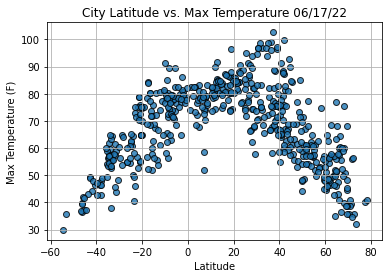

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

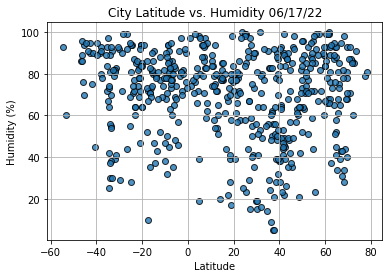

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

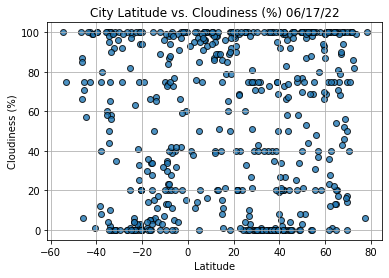

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


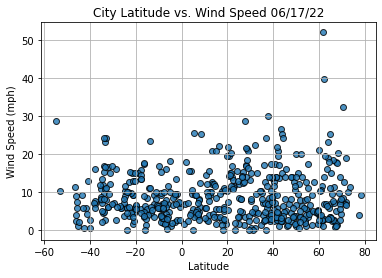

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

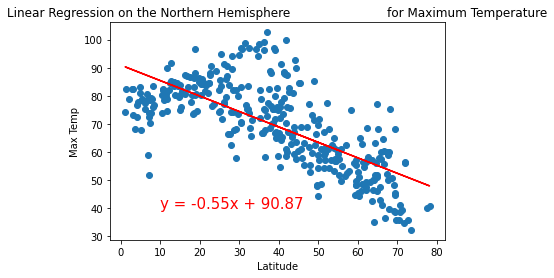

In [27]:
# Import linregress
from scipy.stats import linregress


# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


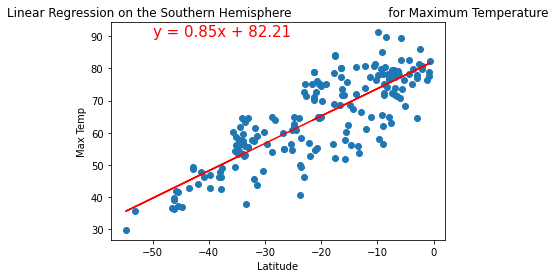

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

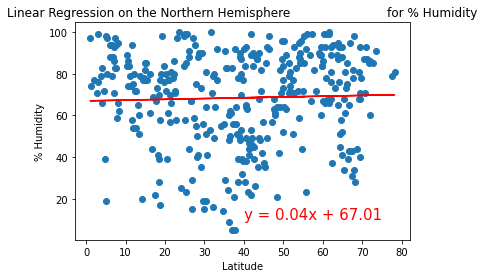

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

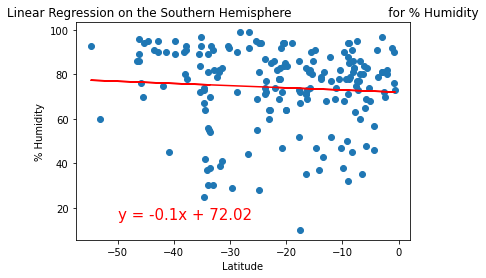

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

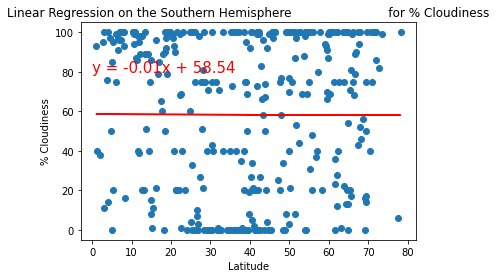

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

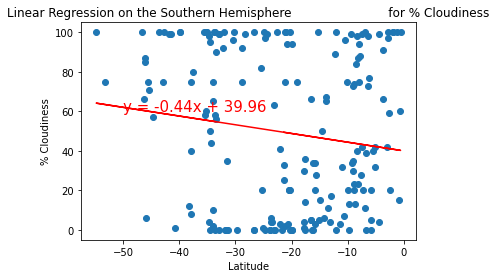

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

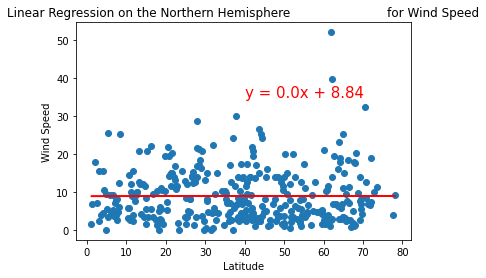

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

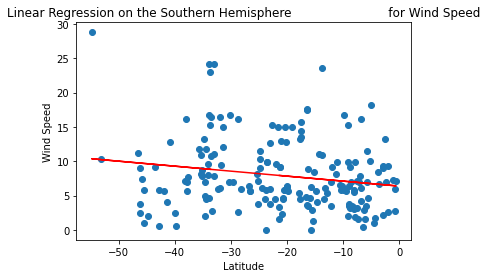

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))